In [22]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 64          #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 5000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.1       #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots

def plot_data(y):
    #view the data in time and frequency domain
    #calculate the frequency domain for viewing purposes
    N_FFT = float(len(y))
    f = np.arange(0,Fs/2,Fs/N_FFT)
    w = np.hanning(len(y))
    y_f = np.fft.fft(np.multiply(y,w))
    y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))
    pl.subplot(3,1,1)
    pl.plot(t[0:Fs*N_prntbits/Fbit],m[0:Fs*N_prntbits/Fbit])
    pl.xlabel('Time (s)')
    pl.ylabel('Frequency (Hz)')
    pl.title('Original VCO output versus time')
    pl.grid(True)
    pl.subplot(3,1,2)
    pl.plot(t[0:Fs*N_prntbits/Fbit],y[0:Fs*N_prntbits/Fbit])
    pl.xlabel('Time (s)')
    pl.ylabel('Amplitude (V)')
    pl.title('Amplitude of carrier versus time')
    pl.grid(True)
    pl.subplot(3,1,3)
    pl.plot(f[0:(Fc+Fdev*2)*int(N_FFT/Fs)],y_f[0:(Fc+Fdev*2)*int(N_FFT/Fs)])
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Amplitude (dB)')
    pl.title('Spectrum')
    pl.grid(True)
    pl.tight_layout()
    pl.show()
    



In [23]:
"""
Data in
"""
#generate some random data for testing
data_in = np.random.random_integers(0,1,N)
data_in

/home/kaminari/anaconda3/envs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

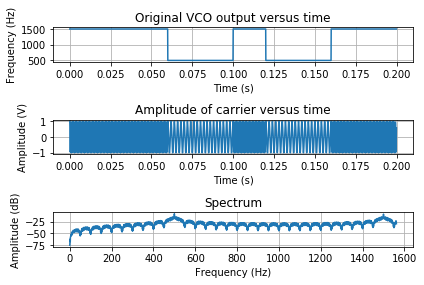

In [20]:
"""
VCO
"""
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(Fs/Fbit),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(Fs/Fbit),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))
plot_data(y)

In [19]:
pl.close()

SNR = 14.004927dB


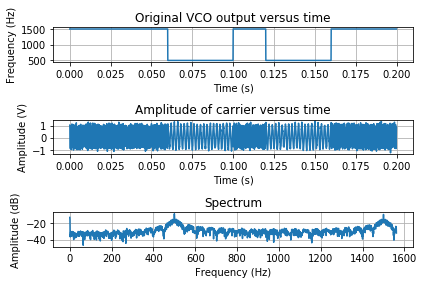

In [21]:
"""
Noisy Channel
"""
#create some noise
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print "SNR = %fdB" % snr
y=np.add(y,noise)
#view the data after adding noise
plot_data(y)